In [1]:
import tweepy
from tweepy import Stream
from tweepy import StreamListener
import json
from textblob import TextBlob
import re
import csv
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation
%matplotlib notebook
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
consumer_key = '#'
consumer_secret_key = '#'
access_token = '#'
access_token_secret = '##'

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret_key)
auth.set_access_token(access_token, access_token_secret)

In [4]:
api = tweepy.API(auth)

## **Get my timeline**

In [5]:
tweets = api.home_timeline()

In [6]:
for tweet in tweets:
  print(tweet.text)

#Vikrant will further the deterrence capability of Indian Navy. With this India joins select group of nations with… https://t.co/ei1GaIdTBb
Indigenously developed Aircraft Carrier ‘Vikrant’ made its maiden sail today. It is a testimony of our scientific a… https://t.co/aVsaiKqpaG
Missed Sky Brown in action earlier? Never fear.

Head to BBC Red Button 🔴 and @BBCiPlayer now for all the skateboar… https://t.co/16prFytzPR
Work in progress. Final stages since yesterday, final details to be fixed with all parties involved - player side t… https://t.co/umS3NId3L3
Manchester City are on the verge of agreeing a deal with Aston Villa over the transfer of Jack Grealish in what wou… https://t.co/ZkAXgk4hcR
Jason Kenny's hopes of a ninth Olympic medal have been boosted.

He's comfortably made it through to the 8th finals… https://t.co/HbLHmvmFeW
England have won the toss against India and captain Joe Root has opted to bat first.

📲📻 Live updates and commentar… https://t.co/TLTOY2WROP
🔴🔵 Four years 

## **Get twitter stream and do sentiment analysis**

In [7]:
trump = 0
warren = 0

header_name = ['Trump', 'Warren']
with open('sentiment.csv', 'w') as file:
    writer = csv.DictWriter(file, fieldnames=header_name)
    writer.writeheader()
    
class listener(StreamListener):
  def on_data(self, data):
    raw_tweets = json.loads(data)
    try:
      tweets = raw_tweets['text']
      tweets = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweets).split())
      tweets = ' '.join(re.sub('RT',' ', tweets).split())
      blob = TextBlob(tweets.strip())
            
      global trump
      global warren
      
      trump_sentiment = 0
      warren_sentiment = 0
      
      for sent in blob.sentences:
          if "Trump" in sent and "Warren" not in sent:
              trump_sentiment = trump_sentiment + sent.sentiment.polarity
          else:
              warren_sentiment = warren_sentiment + sent.sentiment.polarity
      
      trump = trump + trump_sentiment
      warren = warren + warren_sentiment
      
      with open('sentiment.csv', 'a') as file:
          writer = csv.DictWriter(file, fieldnames=header_name)
          info = {
              'Trump': trump,
              'Warren': warren
          }
          writer.writerow(info)
      print(tweets)
      print()
    except:
      print('Error found')



  def on_error(self, status):
    print(status)

In [9]:
twitter_stream = Stream(auth, listener())
twitter_stream.filter (track=['Trump', 'Warren'])

Just say the election was corrupt leave the rest to me should trigger section 3 of the 14th amendment which bar

2 years ago today a white supremacist drove over 600 miles from DFW to my city and killed 23 innocent people His manifest

Cuomo must resign immediately according to the people who have been quiet about Trump and Gaetz molesting and raping und

Well then it must be true I heard they all did it because they heard Trump has pics of them with

See the difference Trump is further imperiling our democracy with every hate fest

Since when did international law trump the law of a sovereign state

Donald Trump recauda m s dinero en donativos que el Partido Republicano en lo que va de 2021

Don t forget about Trump s Victims poor innocent s

Hey what about the handwritten notes released last week that nail the case against Trump trying to overthrow the last elect

Thanks for the moment of honesty and acknowledging that I do work to hold my own party accountable Now wou

How is it tha

KeyboardInterrupt: ignored

## **Plotting the data**

In [10]:
plt.style.use('fivethirtyeight') # for real time make plot in another notebook where sentiment.csv can be accessed. here since sentiment.csv as not accessible in another colab notebook i am just plotting existing data

We are going to show the recent 10000 tweet data on the plot. Hence we have set frame_len = 10000.
We have set the canvas size to 9x6.
Then we are creating a function animate() and inside that, we are going to read the sentiment.csv file which contains the live data.
After that, we are copying the Trump sentiment data to y1 and Warren sentiment data to y2.
Then we are checking the length. If length is less than 10000 we are plotting the data as it is otherwise we are only plotting the recent 10000.
FuncAnimation() makes an animation by repeatedly calling the function animate().The first parameter of FuncAnimation() is the figure object used to get needed events, such as draw or resize. plt.gcf() gets the current figure. interval sets the delay between frames in milliseconds.

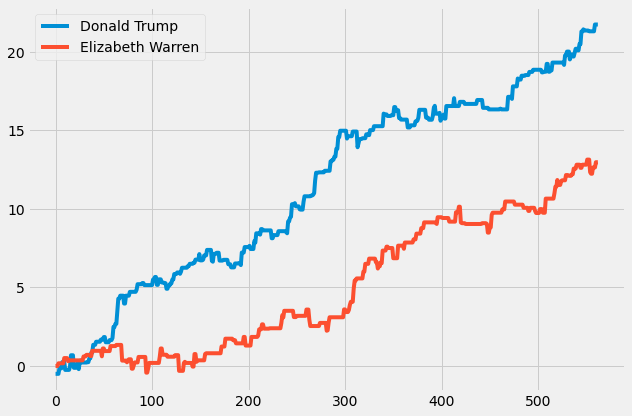

In [11]:
frame_len = 10000

fig = plt.figure(figsize=(9,6))

def animate(i):
    data = pd.read_csv('sentiment.csv')
    y1 = data['Trump']
    y2 = data['Warren']

    if len(y1)<=frame_len:
        plt.cla()
        plt.plot(y1, label='Donald Trump')
        plt.plot(y2, label='Elizabeth Warren')
    else:
        plt.cla()
        plt.plot(y1[-frame_len: ], label='Donald Trump')
        plt.plot(y2[-frame_len: ], label='Elizabeth Warren')
    
    plt.legend(loc='upper left')
    plt.tight_layout()


ani = FuncAnimation(plt.gcf(), animate, interval=1000)